In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
df=pd.read_csv('E:/car data.csv')

In [2]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

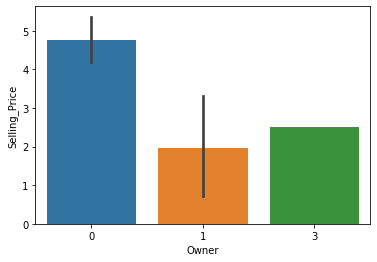

In [3]:
sns.barplot(x='Owner',y='Selling_Price',data=df)

In [4]:
#owner 0 is having morenselling price

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

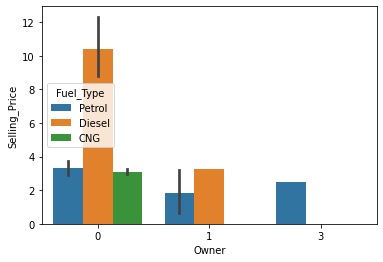

In [5]:
sns.barplot(x='Owner',y='Selling_Price',hue='Fuel_Type',data=df)

In [6]:
#owner sells Diesel cars for more cost

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

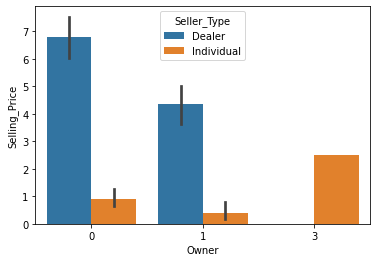

In [8]:
sns.barplot(x='Owner',y='Selling_Price',hue='Seller_Type',data=df)

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

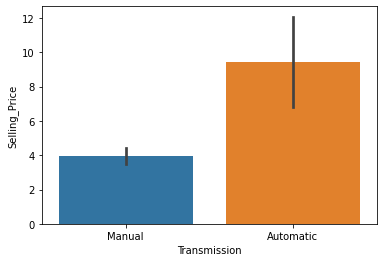

In [10]:
sns.barplot(x='Transmission',y='Selling_Price',data=df)

<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

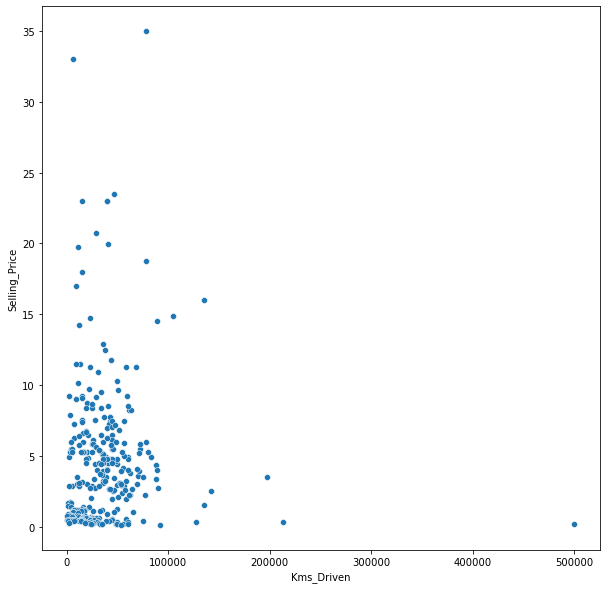

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Kms_Driven',y='Selling_Price',data=df)

<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

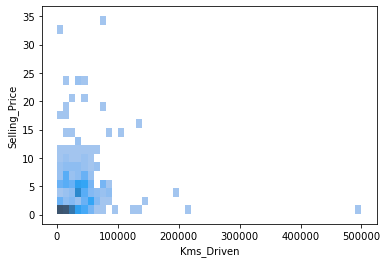

In [18]:
sns.histplot(x='Kms_Driven',y='Selling_Price',data=df)

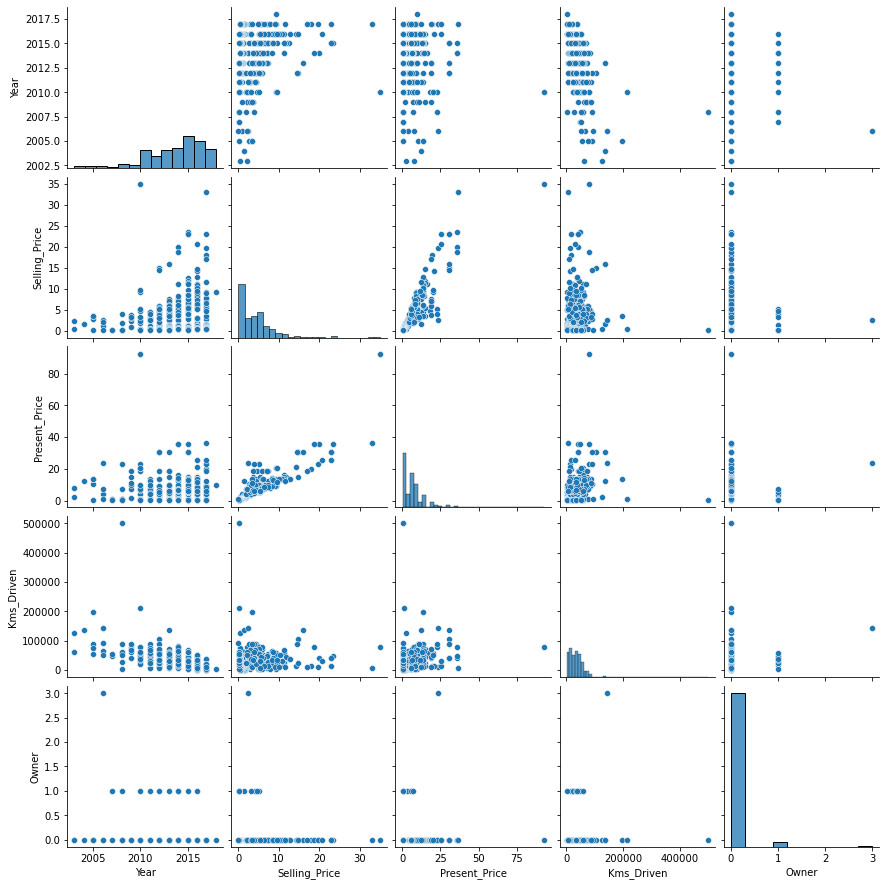

In [20]:
sns.pairplot(data=df)

# Seperating the independant and dependant features

In [25]:
#y becomes dependent features
Y=df[['Selling_Price']]
Y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [32]:
#dropiing sellig price since its a dependent variable and car name we can drop since its has many  diff car
# x becomes independent features 
X=df.drop(['Selling_Price','Car_Name'],axis=1)
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0


In [36]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [37]:
df['Fuel_Type']=df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':3}).astype(int)
df['Seller_Type']=df['Seller_Type'].map({'Dealer':0,'Individual':1}).astype(int)
df['Transmission']=df['Transmission'].map({'Manual':0,'Automatic':1}).astype(int)
df['Owner']=df['Owner'].replace(3,2)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int32  
 6   Seller_Type    301 non-null    int32  
 7   Transmission   301 non-null    int32  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 17.8+ KB


In [39]:
X=df.drop(['Selling_Price','Car_Name'],axis=1)
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


# Fitting and comparing 3 different regression models
1. Linear Regression 2. RIdge Regression 3. Lasso regression

In [27]:
# while creating linear regression we should consider all the 3 diff regression models

# first we proceed with applying ML model we need to have data to be split into test data and train data

In [29]:
#Train test Split The data
#import required libraries to perform ML-model
#we set random_state to some numbers , if we not set then everytime we get different data sets of value

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

Fitting a simple Linear regression model

In [42]:
#standard scallar is used to convert to data into scaled one for better and fast execution of a data

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

s=StandardScaler()

X_train_S = s.fit_transform(X_train)

linear = LinearRegression().fit(X_train_S, Y_train)

X_test_S=s.transform(X_test)

In [45]:
X_train_S

array([[-1.99046855, -0.76923237, -0.83904661, ...,  1.35566878,
         2.85139173, -0.20327891],
       [-0.24444351,  1.26268234,  0.43381798, ..., -0.73764331,
        -0.35070593, -0.20327891],
       [ 0.80317152,  0.38139709,  0.12793616, ..., -0.73764331,
        -0.35070593, -0.20327891],
       ...,
       [ 0.1047615 , -0.44579392, -0.49554421, ...,  1.35566878,
        -0.35070593,  4.06557814],
       [-0.94285352,  0.292367  ,  0.74767564, ..., -0.73764331,
        -0.35070593, -0.20327891],
       [ 1.15237653, -0.63399678, -0.78963873, ...,  1.35566878,
        -0.35070593, -0.20327891]])

In [46]:
X_test_S

array([[ 0.80317152, -0.77035933, -0.31908751, -0.45853503,  1.35566878,
         2.85139173, -0.20327891],
       [ 0.80317152,  0.69807376, -0.62541635, -0.45853503, -0.73764331,
        -0.35070593, -0.20327891],
       [-0.59364851,  0.2247492 ,  0.52790469,  1.63477706, -0.73764331,
        -0.35070593, -0.20327891],
       [-0.94285352, -0.77035933, -0.06028433, -0.45853503,  1.35566878,
        -0.35070593,  4.06557814],
       [-0.24444351,  1.26268234,  0.057377  , -0.45853503, -0.73764331,
        -0.35070593, -0.20327891],
       [ 0.45396651,  0.17065497,  0.11304321,  1.63477706, -0.73764331,
        -0.35070593, -0.20327891],
       [ 0.45396651, -0.66893264, -0.27203238, -0.45853503,  1.35566878,
        -0.35070593, -0.20327891],
       [ 0.1047615 , -0.73542347, -0.69552848, -0.45853503,  1.35566878,
        -0.35070593, -0.20327891],
       [ 0.80317152, -0.77374022, -0.55436312, -0.45853503,  1.35566878,
        -0.35070593, -0.20327891],
       [ 0.1047615 ,  0.2867

In [47]:
# as we can see above Xtest and xtrain data is done standard scalar

In [52]:
from sklearn.metrics import r2_score
y_pred=linear.predict(X_test_S)

In [54]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [58]:
rmse(Y_test,y_pred)

1.8715613141799947

In [59]:
# may be This model is working quite fine ! with a root mean square error of just 1.8715613141799947

# Adding Polynomial Features

In [63]:
from sklearn.preprocessing import PolynomialFeatures
degree = 4
pf = PolynomialFeatures(degree)
X_poly=pf.fit_transform(X)


In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X_poly,Y,test_size=0.3,random_state=42)

In [65]:
s=StandardScaler()

X_train_S = s.fit_transform(X_train)

lr=LinearRegression()

lr.fit(X_train_S,Y_train)

X_test_S=s.transform(X_test)


y_pred=lr.predict(X_test_S)

In [66]:
rmse(Y_test,y_pred)

78.2187294788691

Whoops ! I guess we added too many polynomial features and made the model too complex . Let's try regularisation and try to find a bias-variance trade off

Root mean square error (RMSE) is one of the standard ways to measure the error of a model in predicting quantitative data.

# Trying regularization now !

In [67]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train_S, Y_train)

ridgeCV_rmse = rmse(Y_test, ridgeCV.predict(X_test_S))

print(ridgeCV.alpha_, ridgeCV_rmse)

80.0 1.7086199048327102


Ridge regression really helped us bring the rmse back to normal

In [68]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train_S, Y_train)

lassoCV_rmse = rmse(Y_test, lassoCV.predict(X_test_S))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1881921903977783, tolerance: 0.307077306
  model = cd_fast.enet_coordinate_descent(
C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.662897078961105, tolerance: 0.307077306
  model = cd_fast.enet_coordinate_descent(
C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: O

0.0005 4.937156236734335


C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.178881251573884, tolerance: 0.5153953598095238
  model = cd_fast.enet_coordinate_descent(


Conclusions
Present price of a car directly influences Selling Price prediction. Both are highly correlated and here directly proportional to each other.
Resale value of Automatic vehicle is more than that of a Manual vehicle.
Car age is effecting negatively as the Selling Price decreases for an older car.
Resale value of cars with Fuel type Diesel is higher.
Lasso Regression (lamba=0.0005) performs better than Ridge Regression (lambda=1.0) which inturn performs better than a plain ol Simple linear Regression model Adding Too many polynomial features to this model was a mistake which was corrected by reguralization

# Suggestions

My Suggestions to you to further increase the accuracy of the prediction is to find more features for the same cars from any cars data like their horsepower, Max-Rpm , Torque , Turning Radius , How many seater car it is , Colour of the car etc . Adding these features and then creating polynomial features and using regularization might increase the accuracy of prediction even more